# Conterfactual Interpolation on FFHQ

This notebook demonstrates the process of counterfactual interpolation between two images from FFHQ dataset under two settings:

1. subset interpolation: interpolating a feature subset of the image pair.
2. full-dimension interpolation: interpolating the whole feature of the image pair.

## Import Libraries

In [21]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

from notebooks.exp_interp import interpolate
from PIL import Image
from functools import partial

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Configuration and Setup

Please replace the placeholders in the following cell with your actual paths:

- `pdae_model_path` with the path to your PDAE model.
- `diti_model_path` with the path to your DiTi model.
- `ffhq_data_path` with the path to your FFHQ data.

In [28]:
pdae_model_path = "/path/to/your/pdae/model"
diti_model_path = "/path/to/your/diti/model"
ffhq_data_path = "/path/to/your/ffhq/data"
img1, img2 = 14412, 2342  # indexes of the image pair from the ffhq dataset
f, r = 50, 50             # ddim forward (inversion) and reverse (generation) steps
gpu = 0                   # gpu device
alpha_range = [0, 1/3, 2/3, 1.]  # interpolation scale

get_interpolation = partial(
    interpolate,
    img1 = img1,  # 1st image index from the ffhq dataset
    img2 = img2,   # 2nd image index from the ffhq dataset
    data_path = ffhq_data_path,
    f = f,  # ddim inversion steps
    r = r,  # ddim generation steps
    gpu = gpu,  # which gpu device
    alpha_range = alpha_range
)



Args of function `interpolate`:

- ckpt_root (str): the path to the model directory containing ckps, configs, etc.
- data_path (str): the path to the dataset.
- img1 (int): 1st image index from the ffhq dataset
- img2 (int): 2nd image index from the ffhq dataset
- f (int): ddim forward (inversion) steps
- r (int): ddim reverse (generation) steps
- gpu (int): gpu device index
- alpha_range (List[
- mask_z (bool): whether to mask image feature `z` during generation. Given trainining strategy, pdae False, diti True.
- loc (List[int]): the list of start point of the dimension of the interpolated segments.
- wid (List[int]): the list of width of the interpolated segments.
 `loc` and `wid` together define one or more segments to be interpolated given the image pair.
For example:
 1) loc = [0], wid = [64] does the interpolation over feature dimension from 0 to 64 dim, i.e. full dimension.
 2) loc = [2, 16], wid = [4, 8] interpolates two segments: segment 2 ~ 6 and 16 ~ 24.

## Subset Interpolation

Every image pair are interpolated on a specific subset of $\{\mathbf{z}_i\}_{i=1}^k$ to gradually transition towards its counterpart with different scales (1/4, 2/4, 3/4 and 1 by default). Each row is the result of interpolating on a subset, with the subset range displayed on the left.

**PDAE results**

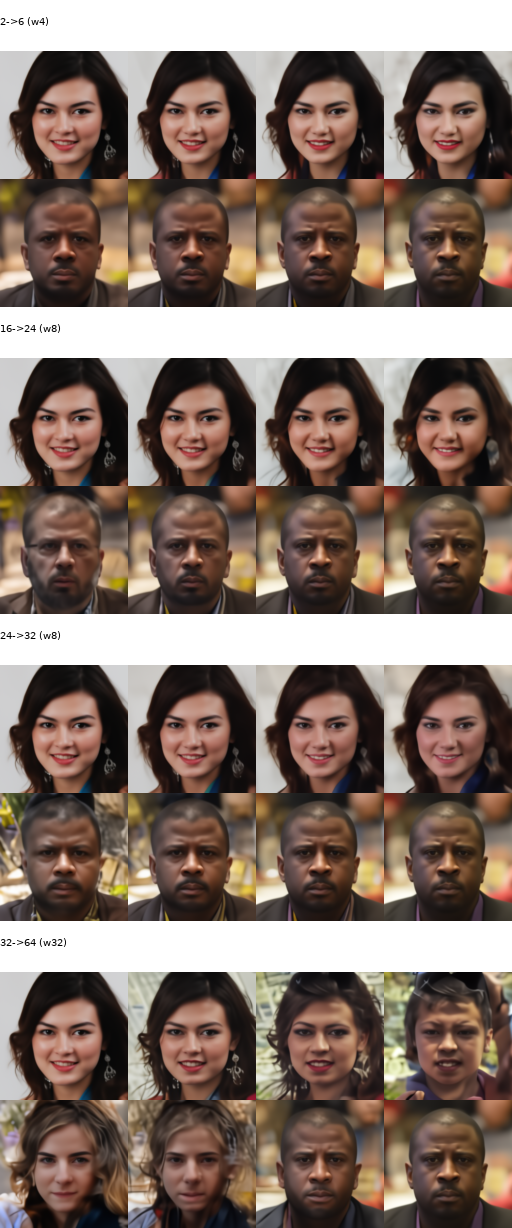

In [16]:
image = interpolate(
    img1 = 14412,  # image index from the celeba dataset
    img2 = 2342,
    
    ckpt_root = pdae_model_path,
    data_path = ffhq_data_path,
    mask_z = False,
    f = 50,  # ddim inversion steps
    r = 50,  # ddim generation steps
    gpu = 0,  # which gpu device
    
    loc = [2, 16, 24, 32],
    wid = [4, 8, 8, 32],
)
image.canvas

**DiTi (Ours) results**

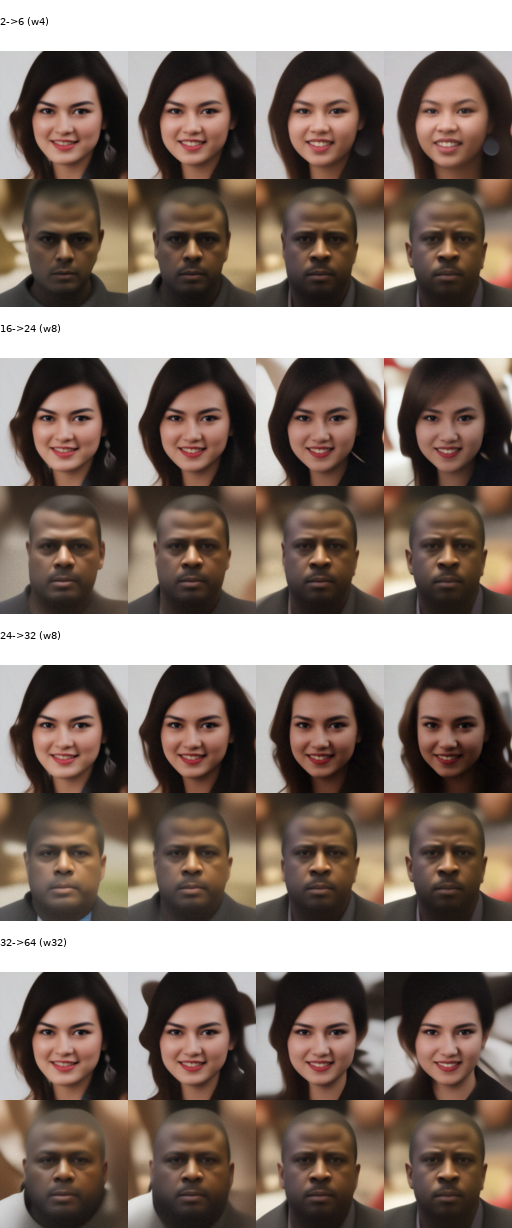

In [10]:
image = interpolate(
    img1 = 14412,  # image index from the celeba dataset
    img2 = 2342,
    
    ckpt_root = "/media/data1/zhongqi/diti_runs/tmp/from_GPGPU_2023-05-15_14-11-03/ffhq/ffhq_pdae64_stopgrad-3-8v100",
    data_path = ffhq_data_path,
    f = 50,  # ddim inversion steps
    r = 50,  # ddim generation steps
    gpu = 0,  # which gpu device
    
    loc = [2, 16, 24, 32],
    wid = [4, 8, 8, 32],
)
image.canvas

## Full-dim Interpolation

Interpolation results on FFHQ using all dimensions of the feature

**PDAE results**

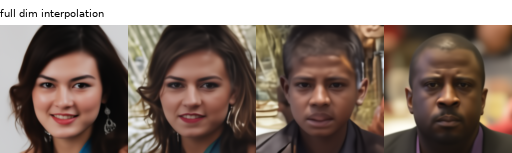

In [20]:
image = interpolate(
    img1 = 14412,  # image index from the celeba dataset
    img2 = 2342,
    
    ckpt_root = pdae_model_path,
    data_path = ffhq_data_path,
    mask_z = False,
    f = 50,  # ddim inversion steps
    r = 50,  # ddim generation steps
    gpu = 0,  # which gpu device
)
image.canvas

**DiTi (Ours) results**

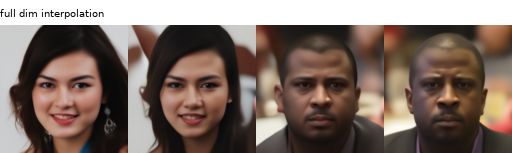

In [18]:
image = interpolate(
    img1 = 14412,  # image index from the celeba dataset
    img2 = 2342,
    
    ckpt_root = diti_model_path,
    data_path = ffhq_data_path,
    f = 50,  # ddim inversion steps
    r = 50,  # ddim generation steps
    gpu = 0,  # which gpu device
)
image.canvas